In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt

from ram.analysis.run_manager import RunManager
from ram.analysis.model_selection.combo_search import CombinationSearch
from ram.analysis.model_selection.pair_search import PairSearch
from ram.analysis.statistics import get_stats, rollup_returns

In [2]:
RunManager.get_run_names('StatArbStrategy')

,RunName,RunDate,Completed,Description
0,run_0068,2018-03-06,True,"Sector 20, version 002"
1,run_0069,2018-03-07,True,"Sector 20, version 2 rerun with univ filtering"
2,run_0070,2018-03-19,True,"Sector 20, post refactor run"
3,run_0071,2018-03-21,True,"Sector 20, 2001 start date, 16cpu comp"
4,run_0072,2018-03-21,True,"Sector 20, 2001 start date, 64cpu comp"
5,run_0078,2018-04-18,True,"Sector 20, new pricing data"
6,run_0079,2018-04-25,True,Rerun with data since 2004
7,run_0080,2018-04-26,False,Rerun of version 24 data
8,run_0081,2018-04-30,True,New hyperparams
9,run_0085,2018-05-01,True,"new params, longer params/hyperparms"


In [3]:
drop_params = [('model', "{u'type': u'reg'}"), ('per_side_count', 5), ('score_var', 'prma_20')]

run1 = RunManager('StatArbStrategy', 'run_0100', drop_params=drop_params, test_periods=0)
run2 = RunManager('StatArbStrategy', 'run_0090', drop_params=drop_params, test_periods=0)

In [4]:
run1.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,holding_period,3,96,0.953338,0.073303,-999.0
1,holding_period,5,96,0.932833,0.074618,-999.0
2,holding_period,7,96,0.889323,0.073342,-999.0
3,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",288,0.925165,0.073754,-999.0
4,per_side_count,10,144,1.055511,0.074493,-999.0
5,per_side_count,20,144,0.794819,0.073015,-999.0
6,response_days,10,144,0.922358,0.073060,-999.0
7,response_days,5,144,0.927971,0.074449,-999.0
8,response_type,Simple,288,0.925165,0.073754,-999.0
9,score_var,boll2_40,24,0.879472,0.092365,-999.0


In [35]:
run2.analyze_parameters()

,Param,Val,Count,MeanTotalRet,MeanSharpe,no_stat
0,holding_period,3,96,0.989071,0.077160,-999.0
1,holding_period,5,96,0.930500,0.075779,-999.0
2,holding_period,7,96,0.876131,0.073603,-999.0
3,model,"{u'max_features': 0.8, u'n_estimators': 30, u'...",288,0.931901,0.075514,-999.0
4,per_side_count,10,144,1.063495,0.076311,-999.0
5,per_side_count,20,144,0.800306,0.074718,-999.0
6,response_days,10,144,0.929022,0.075366,-999.0
7,response_days,5,144,0.934779,0.075662,-999.0
8,response_type,Simple,288,0.931901,0.075514,-999.0
9,score_var,boll2_40,24,0.859912,0.091133,-999.0


In [5]:
comb1 = CombinationSearch()
comb1.set_selection_criteria('sharpe')
comb1.params['training_epochs'] = 20

comb1.add_run(run1)
comb1.start()

Reading and aggregating runs...


  0%|          | 0/20 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 20/20 [04:03<00:00, 11.23s/it]


In [37]:
comb2 = CombinationSearch()
comb2.set_selection_criteria('sharpe')
comb2.params['training_epochs'] = 20

comb2.add_run(run2)
comb2.start()

Reading and aggregating runs...


  0%|          | 0/20 [00:00<?, ?it/s]

Finished aggregating runs...


100%|██████████| 20/20 [04:20<00:00, 12.94s/it]


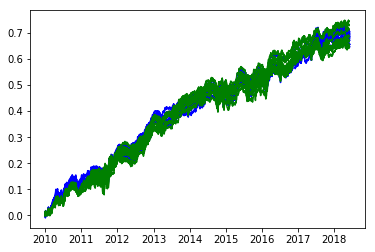

In [38]:
plt.figure()
plt.plot(comb1.best_results_returns.cumsum(), 'b')
plt.plot(comb2.best_results_returns.cumsum(), 'g')
plt.show()

In [43]:
df = rollup_returns(comb2.best_results_returns)
df['year'] = df.sum(axis=1)
df

Qtr,1,2,3,4,year
Year,,,,,
2009,NaN,NaN,NaN,NaN,NaN
2010,0.043976,0.002581,0.064172,-0.006542,0.104188
2011,0.029221,0.025546,-0.016410,0.081577,0.119934
2012,0.018106,-0.013535,0.032954,0.073728,0.111253
2013,-0.009397,0.033268,0.054505,0.011807,0.090183
2014,0.033655,0.003199,-0.019891,0.017517,0.034480
2015,-0.011930,0.042916,-0.027376,0.037186,0.040797
2016,0.066200,-0.019487,0.012179,0.040553,0.099445
2017,0.025625,0.031125,-0.019418,0.004288,0.041620


In [10]:
get_stats(comb1.best_results_returns.dropna()).to_csv('~/risk.csv')

In [12]:
df = rollup_returns(comb1.best_results_returns)
df['year'] = df.sum(axis=1)
df.to_csv('~/yry.csv')

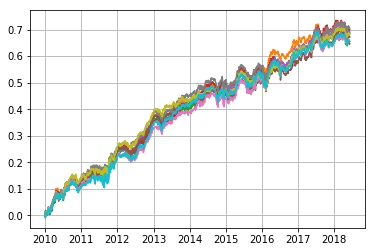

In [15]:
plt.figure()
plt.plot(comb1.best_results_returns.cumsum())
plt.grid()
plt.show()

In [18]:
x = comb1.best_results_returns.iloc[:, 0].dropna()

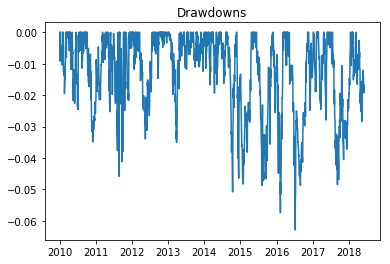

In [22]:
plt.figure()
plt.plot(x.cumsum() - x.cumsum().cummax())
plt.title('Drawdowns')
plt.show()

In [25]:
x.to_csv('~/bestmodel.csv')